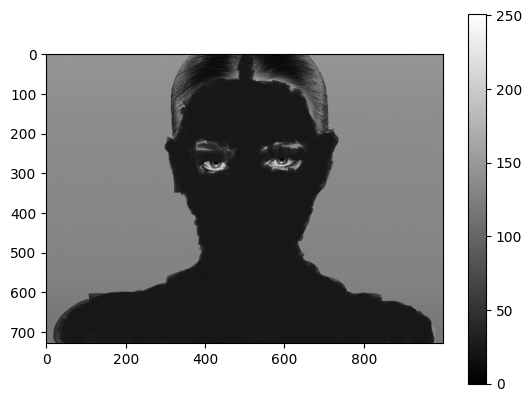

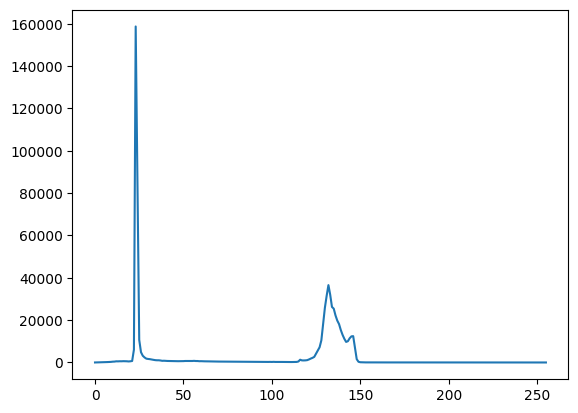

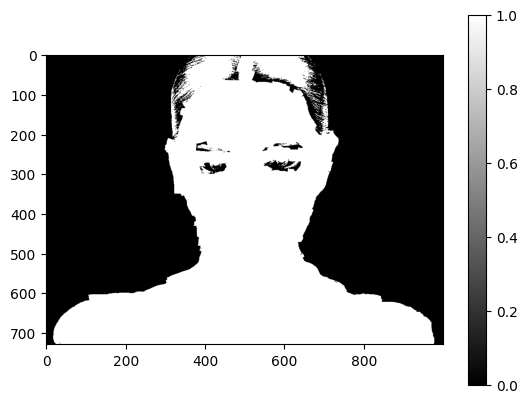

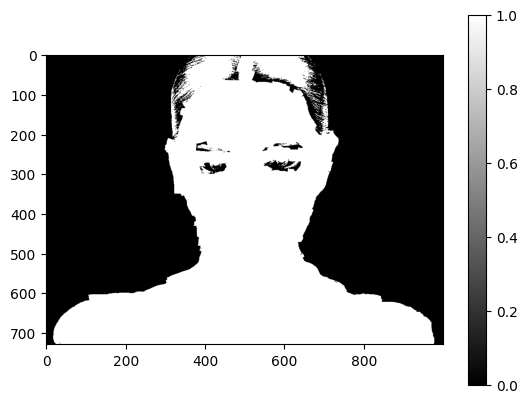

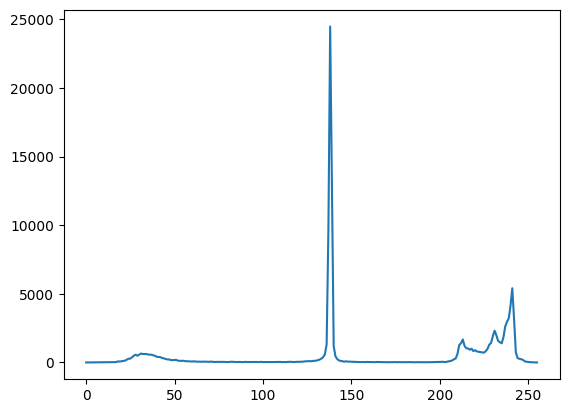

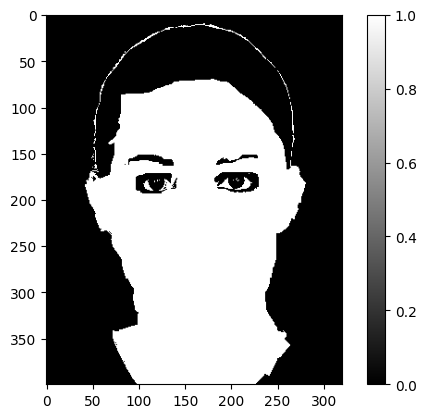

(<Figure size 640x480 with 2 Axes>,
 None)

In [23]:
# Cod 1 (binarizare)

from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt

img = io.imread('1_colorat.jpg')
img_gray = np.uint8(255*color.rgb2gray(img))
plt.figure(), plt.imshow(img_gray, cmap = 'gray'),plt.colorbar(), plt.show()

hist,_ = np.histogram(img_gray, bins=256, range=(0, 255))
plt.figure(), plt.plot(hist), plt.show()

L,C = np.shape(img_gray)
img_out = np.zeros((L,C))
T = 75

for l in range(0,L): 
    for c in range(0,C):
        if img_gray[l,c] < T:
            img_out[l,c] = 1

img_out2 = img_gray < T

plt.figure(), plt.imshow(img_out, cmap = 'gray'),plt.colorbar(), plt.show()
plt.figure(), plt.imshow(img_out2, cmap = 'gray'),plt.colorbar(), plt.show()

img2 = io.imread('3_colorat.jpg')
img_gray2 = np.uint8(255*color.rgb2gray(img2))

hist2,_ = np.histogram(img_gray2, bins=256, range=(0, 255))
plt.figure(), plt.plot(hist2), plt.show()

img_out3 = np.zeros((L,C))
T1 = 100
T2 = 175

L,C = np.shape(img_gray2)
img_out3 = (img_gray2 > T1) & (img_gray2 < T2)

plt.figure(), plt.imshow(img_out3, cmap = 'gray'),plt.colorbar(), plt.show()

(400, 320, 3)


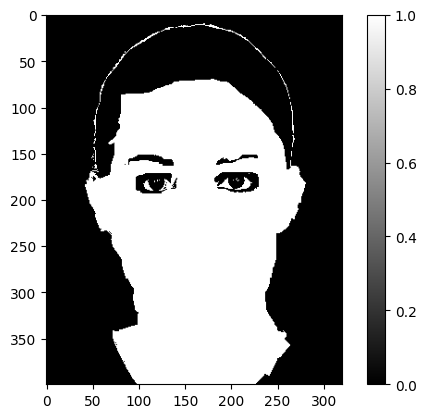

TN = 0.2994296875
 TP = 0.4009140625
 FP = 0.2701640625
 FN = 0.0294921875
 prec = 0.5974178676340057
 rec = 0.9314782543869384


In [69]:
# Activitate 1/2

def my_precrec(MASK, SEGM):
    epsilon=0.00001
    TN = (1-SEGM)*(1-MASK)
    TN_proc = np.sum(TN)/np.size(MASK)
    TP=SEGM*MASK
    TP_proc=np.sum(TP)/np.size(MASK)
    FP=SEGM*(1-MASK)
    FP_proc=np.sum(FP)/np.size(MASK)
    FN=(1-SEGM)*MASK
    FN_proc=np.sum(FN)/np.size(MASK)
    prec=np.sum(TP)/(np.sum(TP)+np.sum(FP)+epsilon)
    rec=np.sum(TP)/(np.sum(TP)+np.sum(FN)+epsilon)
    return TN_proc, TP_proc, FP_proc, FN_proc, prec, rec

# np.logical_and()
img = io.imread('3.jpg')

print(np.shape(img))
L,C,pl = np.shape(img)

R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

C1 = (R > 95) & (G > 40) & (B > 20)
# C2 = (np.max(img, axis=2) - np.min(img, axis=2)) > 15
C2 = (np.max([R,G,B]) - np.min([R,G,B]) > 15)
C3 = np.abs(R-G) > 15
C4 = (R > G)&(R > B)
C5 = (R > 220)&(G > 210)&(B > 170)
C6 = np.abs(R-G) <= 15
C7 = (R > B)&(G > B)

img_out = (C1*C2*C3*C4) + (C5*C6*C7)
img_out[img_out>0] = 1

#img = np.uint8(255*color.rgb2gray(img))
plt.figure(), plt.imshow(img_out3, cmap = 'gray'),plt.colorbar(), plt.show()

TN, TP, FP, FN, prec, rec = my_precrec(img_out3, img_out)

print(f"TN = {TN}\n TP = {TP}\n FP = {FP}\n FN = {FN}\n prec = {prec}\n rec = {rec}")